<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Financial_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import All the Libraries

In [1]:
!pip install mplfinance
!pip install yfinance
!pip install git+https://github.com/kernc/backtesting.py.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00
  Cloning https://github.com/kernc/backtesting.py.git to /tmp/pip-req-build-l2rg80we
  Running command git clone --filter=blob:none --quiet https://github.com/kernc/backtesting.py.git /tmp/pip-req-build-l2rg80we
  Resolved https://github.com/kernc/backtesting.py.git to commit 0ce24d80b1bcb8120d95d31dc3bb351b1052a27d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Backtesting: filename=Backtesting-0.3.4.dev30+g0ce24d8-py3-none-any.whl size=175111 sha256=2d49eaea8d7b25d9d77cf0ac390b743f5e43f7500943c5098b3c177cf4035d7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-xrbztetb/wheels/56/8f/2e/0a677fd9f9f793d59eae94d71a79ea11331cdcfce0c2e73f3e
Successfully built Backtesting


In [2]:
# Uncomment the lines below to install talib on Google Colab
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr --silent
!make --silent
!make install --silent
!pip install Ta-Lib
import talib

--2024-11-19 22:44:28--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-19 22:44:28--  https://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-11-19 22:44:29--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourc

In [3]:
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
import mplfinance as mpf
from datetime import datetime, timedelta
import mplfinance as mpf
import talib as talib
import seaborn as sns

# Get the Data

In [40]:
ticker_symbol = 'NVDA'

df = yf.download(ticker_symbol, start='2023-01-01' )

[*********************100%***********************]  1 of 1 completed


In [41]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-11-13 00:00:00+00:00,146.270004,146.270004,149.330002,145.899994,149.070007,191903300
2024-11-14 00:00:00+00:00,146.759995,146.759995,149.000000,145.550003,147.639999,194463300
2024-11-15 00:00:00+00:00,141.979996,141.979996,145.240005,140.080002,144.869995,250132900
2024-11-18 00:00:00+00:00,140.149994,140.149994,141.550003,137.149994,139.500000,221866000
2024-11-19 00:00:00+00:00,147.009995,147.009995,147.130005,140.990005,141.324997,223234132


# Data Analysis

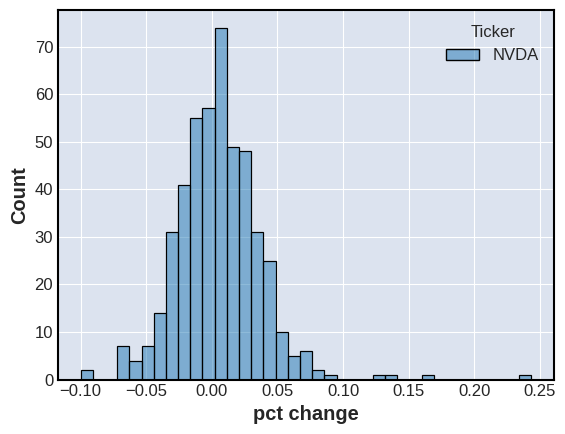

In [42]:
import matplotlib.pyplot as plt

ax = sns.histplot(df['Close'].pct_change())
ax.set(xlabel="pct change")
plt.show()

In [43]:
ticker_symbol = 'AAPL'

df = yf.download(ticker_symbol, start='2015-01-01')
start_yr = df.groupby(df.index.year).first()['Close']
end_yr = df.groupby(df.index.year).last()['Close']

annual_returns = (end_yr-start_yr)/start_yr

annual_returns


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2015,-0.037227
2016,0.099383
2017,0.456995
2018,-0.084291
2019,0.859486
2020,0.767138
2021,0.372151
2022,-0.286138
2023,0.539378


<Axes: xlabel='Date', ylabel='AAPL'>

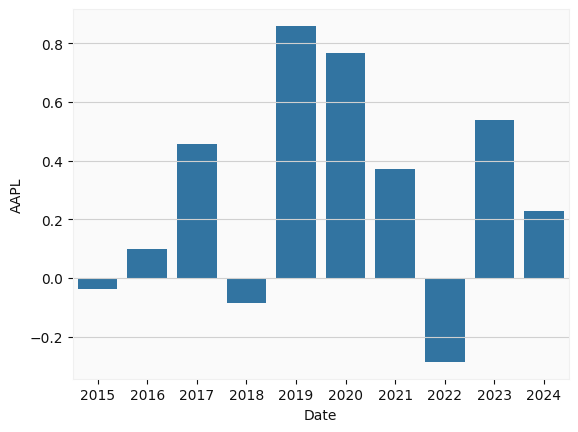

In [66]:
sns.barplot(annual_returns, x ="Date", y ="AAPL")

# Plotting and Charting

In [45]:
ticker_symbol = 'NVDA'

# df = yf.download(ticker_symbol, start='2023-01-01')

In [46]:
df = yf.Ticker(ticker_symbol).history(start="2023-01-01")

In [47]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,14.841229,14.986134,14.086725,14.305581,401277000,0.0,0.0
2023-01-04 00:00:00-05:00,14.557416,14.843228,14.231631,14.739296,431324000,0.0,0.0
2023-01-05 00:00:00-05:00,14.481466,14.554418,14.138692,14.255615,389168000,0.0,0.0
2023-01-06 00:00:00-05:00,14.464477,15.000125,14.024767,14.849224,405044000,0.0,0.0
2023-01-09 00:00:00-05:00,15.273943,16.045435,15.131037,15.617717,504231000,0.0,0.0


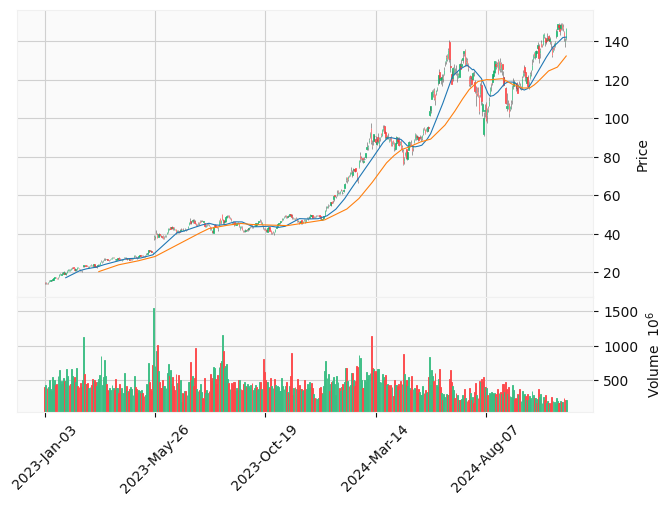

In [48]:
mpf.plot(df,type='candle',style='yahoo',volume=True, mav=(20, 50))

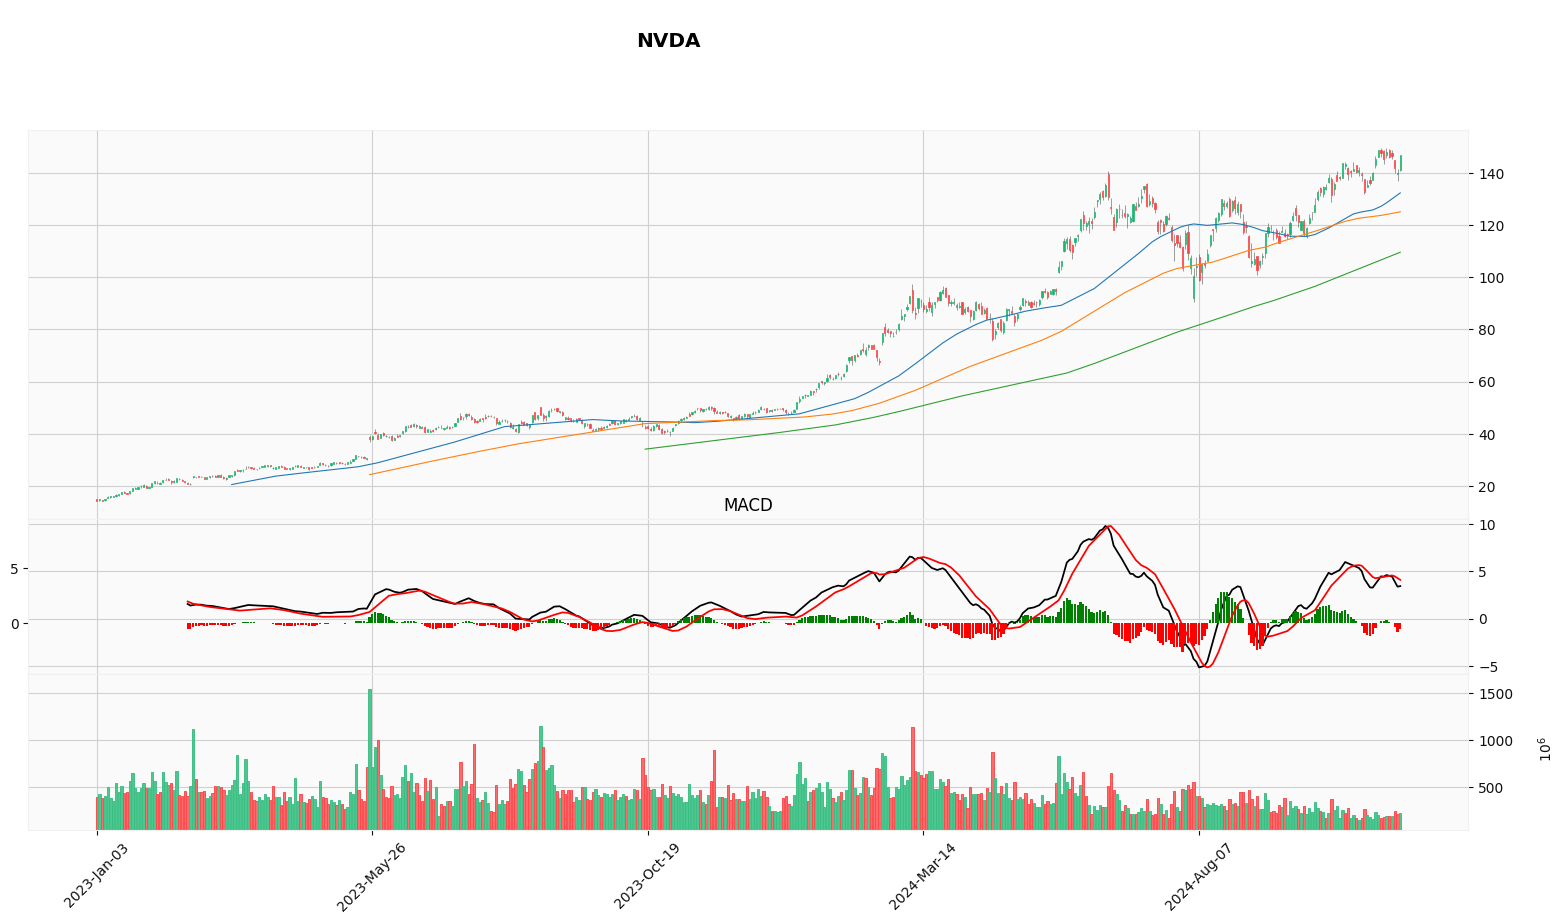

In [65]:
df["macd"], df["macd_signal"], df["macd_hist"] = talib.MACD(df['Close'])
# macd panel
colors = ['g' if v >= 0 else 'r' for v in df["macd_hist"]]
macd_plot = mpf.make_addplot(df["macd"], panel=1, color='black', title="MACD")
macd_hist_plot = mpf.make_addplot(df["macd_hist"], type='bar', panel=1, color=colors) # color='dimgray'
macd_signal_plot = mpf.make_addplot(df["macd_signal"], panel=1, color='red')
# plot
plots = [macd_plot, macd_signal_plot, macd_hist_plot]
mpf.plot(df, type='candle', style='yahoo', mav=(50,100,200), addplot=plots, title=f"\n{ticker_symbol}", volume=True, volume_panel=2, ylabel='', ylabel_lower='', figsize=(20,10))

## Bollinger Bands

(<Figure size 1600x1150 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

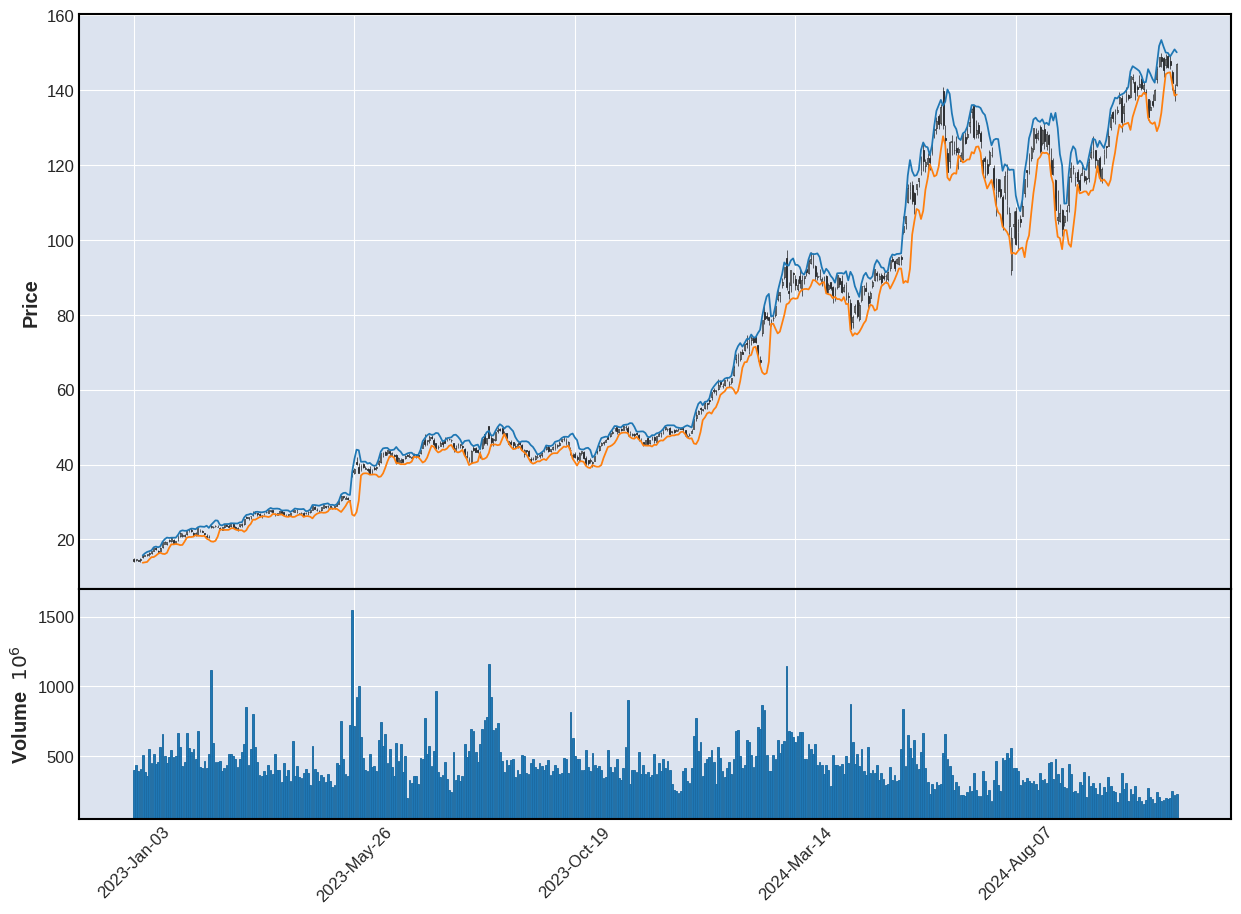

In [50]:
# Calculate Bollinger Band
df["upperband"], df["middleband"], df["lowerband"] = talib.BBANDS(df["Close"], timeperiod=5,
                                                                      nbdevup=2, nbdevdn=2, matype=0)
    # Prune data to last 30 values
#df = df[-30:]


# Place Upper and Lower Bollinger Band in Upper Panel
mpfBB = mpf.make_addplot(df[["upperband", "lowerband"]])

    # List of added Plots
addedPlots = [mpfBB]

# Generate the plots and and return the figure
mpf.plot(df, type='candlestick', volume=True, returnfig=True, addplot=addedPlots, figscale=2.0)


## RSI Plot

(<Figure size 1600x1150 with 6 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='RSI'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

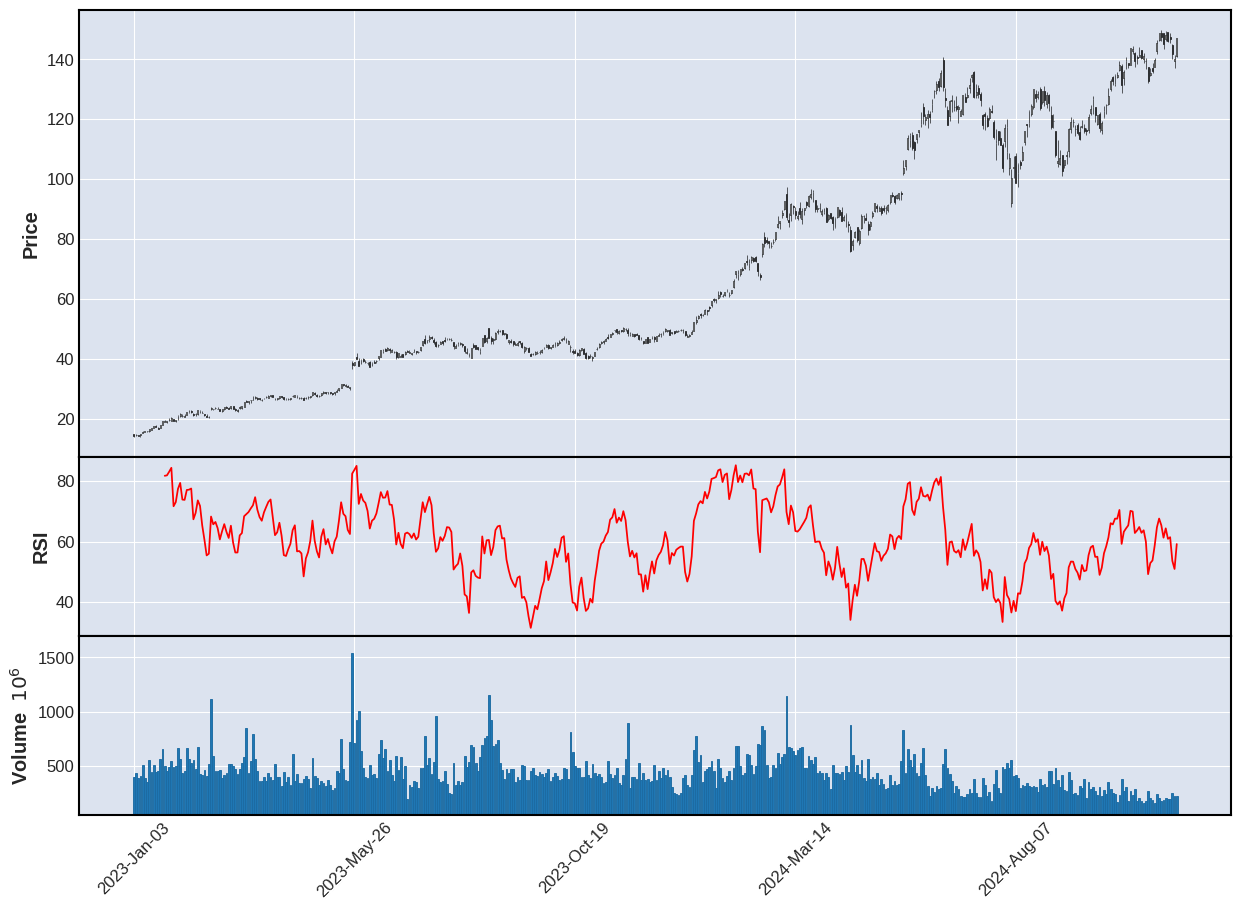

In [51]:
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)


apds = [
    mpf.make_addplot(df['RSI'], ylabel='RSI', panel=1, color="red"),
]


# Generate the plots and and return the figure
mpf.plot(df, type='candlestick', volume=True, returnfig=True, addplot=apds, figscale=2.0, volume_panel = 2)


In [52]:
# Backtesting

Using Backtesting library

In [53]:

from backtesting import Backtest, Strategy
from backtesting.test import SMA, GOOG
from backtesting.test import SMA
from backtesting.lib import crossover
import pandas as pd

class SmaCross(Strategy):
    n1 = 20 # period of the first SMA
    n2 = 50 # period of the second SMA

    def init(self):
        close = self.data.Close # close price data
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
      if crossover(self.sma1, self.sma2):
          self.buy()
      elif crossover(self.sma2, self.sma1):
          self.sell()

In [54]:
from backtesting import Backtest

bt = Backtest(df, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p2074', ...)

In [55]:
print(output)

Start                     2023-01-03 00:00...
End                       2024-11-19 00:00...
Duration                    686 days 00:00:00
Exposure Time [%]                   60.970464
Equity Final [$]                 14058.480697
Equity Peak [$]                  19252.244586
Return [%]                          40.584807
Buy & Hold Return [%]              927.640846
Return (Ann.) [%]                   19.853519
Volatility (Ann.) [%]               60.054947
Sharpe Ratio                         0.330589
Sortino Ratio                        0.627704
Calmar Ratio                         0.329718
Max. Drawdown [%]                   -60.21362
Avg. Drawdown [%]                   -9.764863
Max. Drawdown Duration      155 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades                                    8
Win Rate [%]                             37.5
Best Trade [%]                      74.446122
Worst Trade [%]                      -14.8765
Avg. Trade [%]                    

In [56]:


from backtesting import Backtest, Strategy
from backtesting.test import SMA, GOOG
from backtesting.test import SMA
from backtesting.lib import crossover
from talib import EMA

import pandas as pd

class EmaCross(Strategy):
    n1 = 8 # period of the first SMA
    n2 = 20 # period of the second SMA

    def init(self):
        close = self.data.Close # close price data
        self.ema1 = self.I(EMA, close, self.n1)
        self.ema2 = self.I(EMA, close, self.n2)

    def next(self):
      if crossover(self.ema1, self.ema2):
          self.buy()
      elif crossover(self.ema2, self.ema1):
          self.sell()

In [57]:
from backtesting import Backtest

bt = Backtest(df, EmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p2442', ...)

In [58]:
print(output)

Start                     2023-01-03 00:00...
End                       2024-11-19 00:00...
Duration                    686 days 00:00:00
Exposure Time [%]                    68.14346
Equity Final [$]                 13965.153572
Equity Peak [$]                  17898.438053
Return [%]                          39.651536
Buy & Hold Return [%]              927.640846
Return (Ann.) [%]                   19.429857
Volatility (Ann.) [%]               50.264727
Sharpe Ratio                         0.386551
Sortino Ratio                        0.714845
Calmar Ratio                         0.521886
Max. Drawdown [%]                  -37.230047
Avg. Drawdown [%]                   -9.985862
Max. Drawdown Duration      183 days 00:00:00
Avg. Drawdown Duration       32 days 00:00:00
# Trades                                   16
Win Rate [%]                             25.0
Best Trade [%]                      80.305021
Worst Trade [%]                    -14.401008
Avg. Trade [%]                    

In [59]:
def MACD(close, n1, n2, ns):
    #n1-n2
    macd, macdsignal, macdhist = talib.MACD(close, fastperiod=n1, slowperiod=n2, signalperiod=ns)
    return macd, macdsignal

class MACDCross(Strategy):
    n1 = 12
    n2 = 26
    ns = 9

    def init(self):
        self.macd, self.macdsignal = self.I(MACD, self.data.Close, self.n1, self.n2, self.ns)

    def next(self):
        if crossover(self.macd, self.macdsignal):
            self.buy()
        elif crossover(self.macdsignal, self.macd):
            self.position.close()

In [60]:
bt = Backtest(df, MACDCross, cash=10000, commission=.002)
stats = bt.run()
bt.plot()


/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


GridPlot(id='p2848', ...)

In [61]:
stats

,0
Start,2023-01-03 00:00:00-05:00
End,2024-11-19 00:00:00-05:00
Duration,686 days 00:00:00
Exposure Time [%],52.320675
Equity Final [$],26899.899625
Equity Peak [$],30819.526107
Return [%],168.998996
Buy & Hold Return [%],927.640846
Return (Ann.) [%],69.229096
Volatility (Ann.) [%],58.887015


In [62]:
print(stats['_trades'].to_string())

    Size  EntryBar  ExitBar  EntryPrice   ExitPrice          PnL  ReturnPct                 EntryTime                  ExitTime   Tag         Duration
0    389        52       65   25.653700   26.571018   356.836740   0.035758 2023-03-20 00:00:00-04:00 2023-04-06 00:00:00-04:00  None 17 days 00:00:00
1    371        83       84   27.882060   27.637497   -90.732670  -0.008771 2023-05-03 00:00:00-04:00 2023-05-04 00:00:00-04:00  None  1 days 00:00:00
2    359        86       91   28.565090   28.494079   -25.492782  -0.002486 2023-05-08 00:00:00-04:00 2023-05-15 00:00:00-04:00  None  7 days 00:00:00
3    345        93      119   29.628696   42.444658  4421.506845   0.432552 2023-05-17 00:00:00-04:00 2023-06-26 00:00:00-04:00  None 40 days 00:00:00
4    316       133      138   46.363734   44.713791  -521.382134  -0.035587 2023-07-17 00:00:00-04:00 2023-07-24 00:00:00-04:00  None  7 days 00:00:00
5    307       160      171   45.940051   45.928107    -3.666925  -0.000260 2023-08-23 00:00:0